# 1] Time Forecasting ( Airlines Passengers )

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import files
uploaded= files.upload()

Saving Airlines+Data.xlsx to Airlines+Data.xlsx


# **EDA**

In [ ]:
data = pd.read_excel('Airlines+Data.xlsx')
data

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


In [ ]:
data.shape

(96, 2)

In [ ]:
96/12

8.0

In [ ]:
indexedData = data.set_index(['Month'])
indexedData

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121
...,...
2002-08-01,405
2002-09-01,355
2002-10-01,306


In [ ]:
indexedData.shape

(96, 1)

In [ ]:
indexedData.dtypes

Passengers    int64
dtype: object

In [ ]:
indexedData.isna().sum()

Passengers    0
dtype: int64

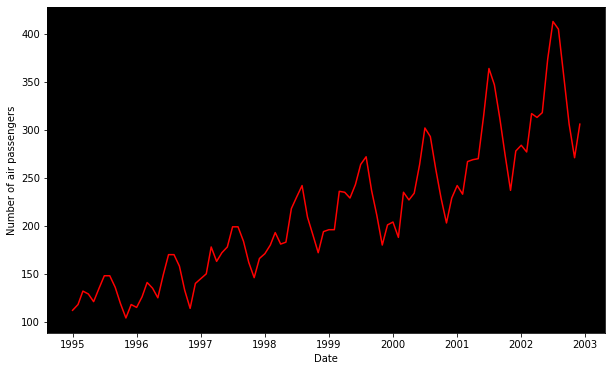

In [ ]:
plt.figure(figsize= (10,6))
plt.xlabel("Date")
plt.ylabel("Number of air passengers")
ax=plt.axes()
ax.set_facecolor("black")
plt.plot(indexedData,color='red')

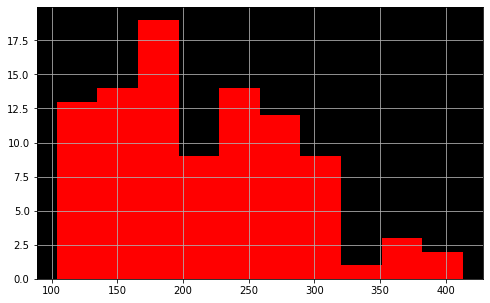

In [ ]:
# Histogram
ax = plt.axes()
ax.set_facecolor("black")
indexedData['Passengers'].hist(figsize=(8,5), color = 'red')

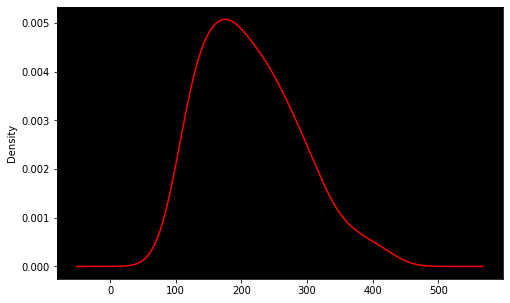

In [ ]:
# Density Plot
ax = plt.axes()
ax.set_facecolor("black")
indexedData['Passengers'].plot(kind = 'kde', figsize=(8,5), color = 'red')

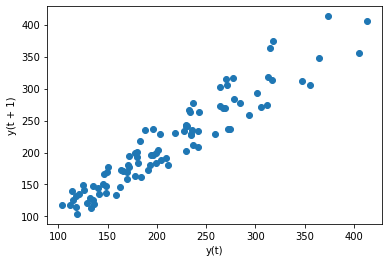

In [ ]:
# Lagplot
from pandas.plotting import lag_plot

lag_plot(indexedData['Passengers'])

plt.show()

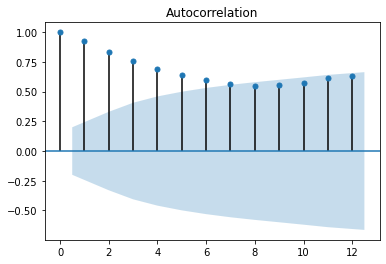

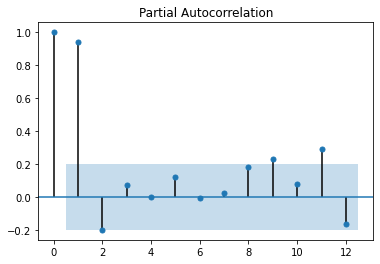

In [ ]:
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(indexedData.Passengers,lags=12)

tsa_plots.plot_pacf(indexedData.Passengers,lags=12)

plt.show()

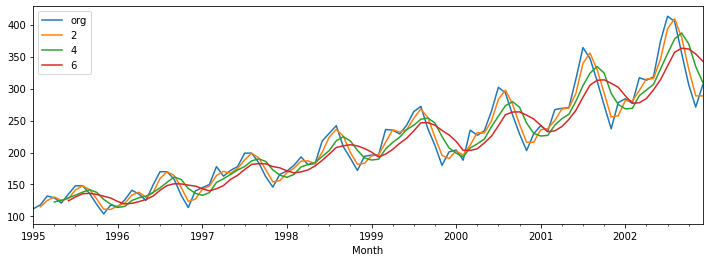

In [ ]:
plt.figure(figsize=(12,4))
indexedData.Passengers.plot(label="org")
for i in range(2,8,2):
   indexedData["Passengers"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')


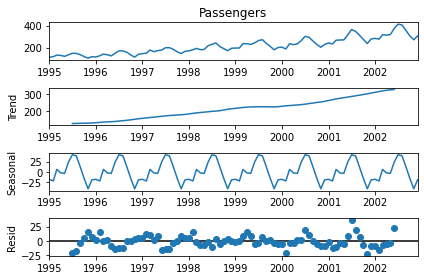

In [ ]:
#Tme series decomposition plot
from statsmodels.tsa.seasonal import seasonal_decompose

decompose_ts_add = seasonal_decompose(indexedData.Passengers,period=12)
decompose_ts_add.plot()
plt.show()

#### Determining optimal window size for moving statistics

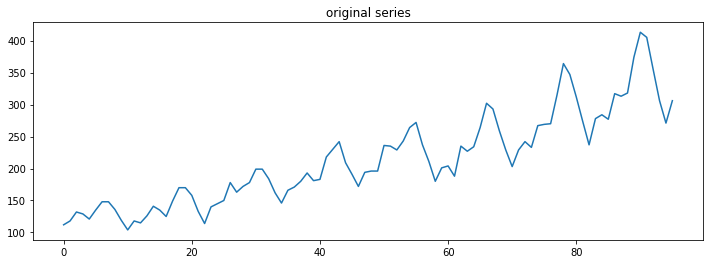

<Figure size 864x288 with 0 Axes>

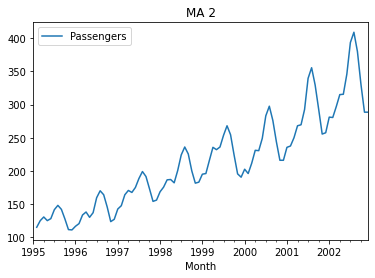

<Figure size 864x288 with 0 Axes>

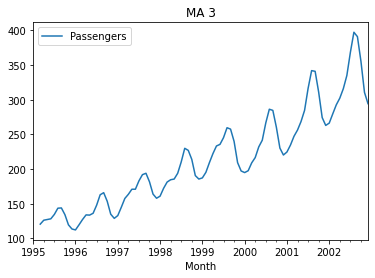

<Figure size 864x288 with 0 Axes>

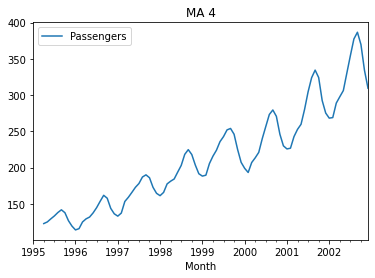

<Figure size 864x288 with 0 Axes>

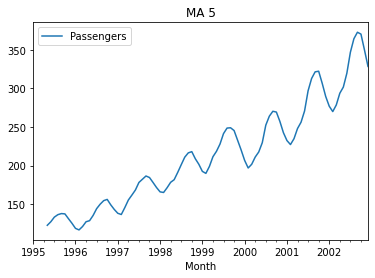

<Figure size 864x288 with 0 Axes>

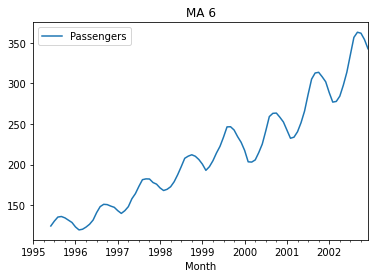

<Figure size 864x288 with 0 Axes>

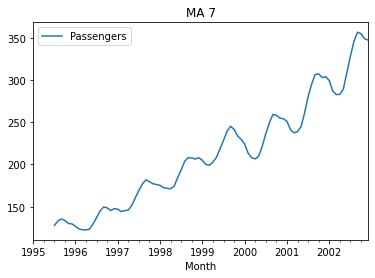

<Figure size 864x288 with 0 Axes>

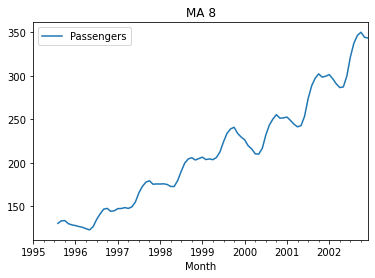

<Figure size 864x288 with 0 Axes>

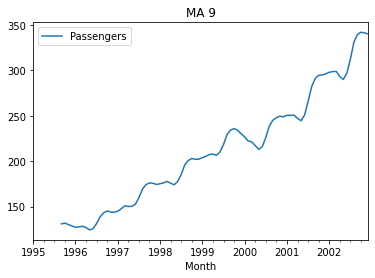

<Figure size 864x288 with 0 Axes>

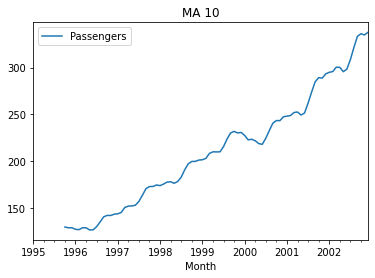

<Figure size 864x288 with 0 Axes>

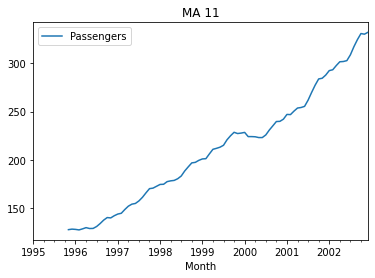

<Figure size 864x288 with 0 Axes>

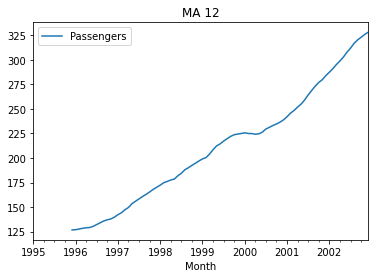

<Figure size 864x288 with 0 Axes>

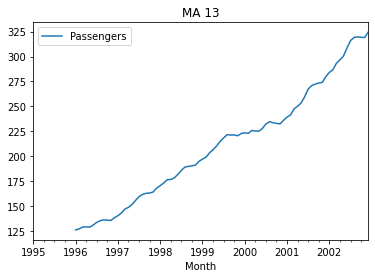

<Figure size 864x288 with 0 Axes>

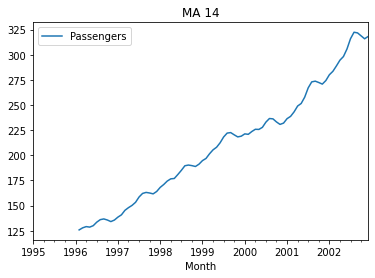

<Figure size 864x288 with 0 Axes>

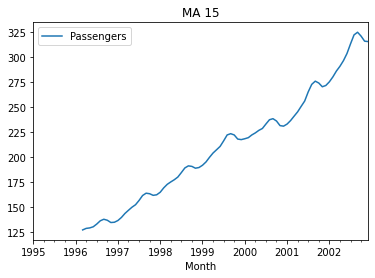

<Figure size 864x288 with 0 Axes>

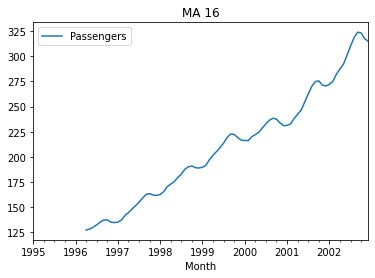

<Figure size 864x288 with 0 Axes>

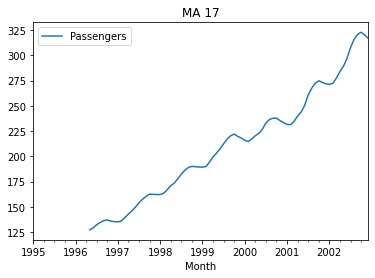

<Figure size 864x288 with 0 Axes>

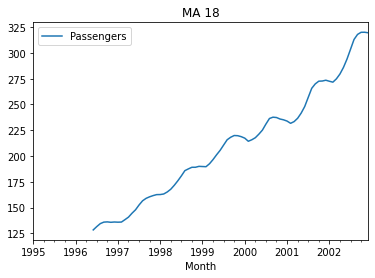

<Figure size 864x288 with 0 Axes>

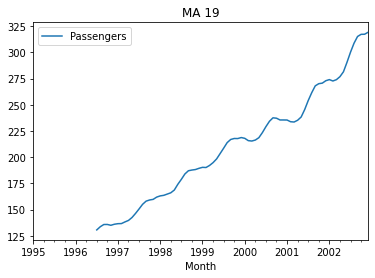

<Figure size 864x288 with 0 Axes>

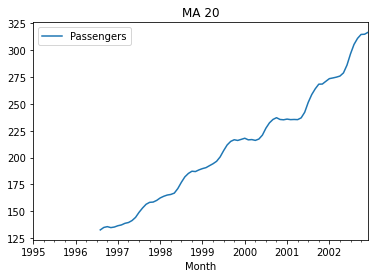

<Figure size 864x288 with 0 Axes>

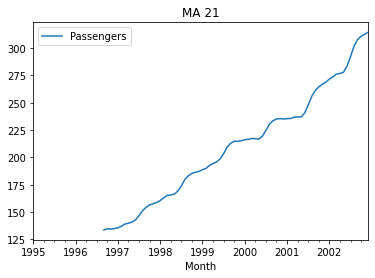

<Figure size 864x288 with 0 Axes>

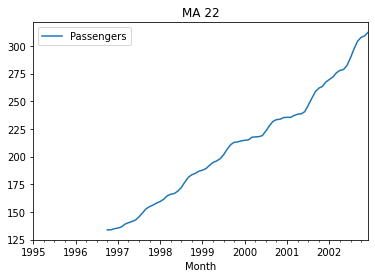

<Figure size 864x288 with 0 Axes>

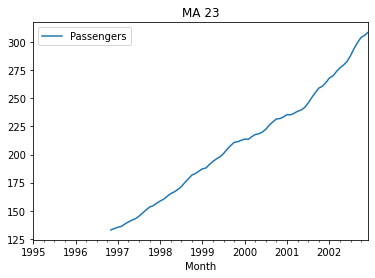

<Figure size 864x288 with 0 Axes>

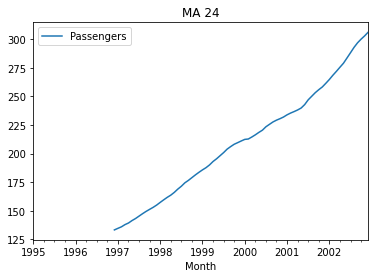

In [ ]:
plt.figure(figsize=(12,4))
data.Passengers.plot(label="org")
plt.title("original series")

for i in range(2,25):                       # to find optimal windaow size
    plt.figure(figsize=(12,4))
     
    indexedData.rolling(i).mean().plot(label=str(i))     # roling is nothing but moving average
    plt.title("MA "+str(i))
    plt.legend(loc='best')
    plt.show()

By seeing the above plots we can clearly say that optimal window size is 12

### Determining Moving statistics

In [ ]:
rolmean = indexedData.rolling(window=12).mean()
rolstd = indexedData.rolling(window=12).std()
print(rolmean, rolstd)

            Passengers
Month                 
1995-01-01         NaN
1995-02-01         NaN
1995-03-01         NaN
1995-04-01         NaN
1995-05-01         NaN
...                ...
2002-08-01  316.833333
2002-09-01  320.416667
2002-10-01  323.083333
2002-11-01  325.916667
2002-12-01  328.250000

[96 rows x 1 columns]             Passengers
Month                 
1995-01-01         NaN
1995-02-01         NaN
1995-03-01         NaN
1995-04-01         NaN
1995-05-01         NaN
...                ...
2002-08-01   54.530781
2002-09-01   55.586883
2002-10-01   53.899668
2002-11-01   49.692616
2002-12-01   47.861780

[96 rows x 1 columns]


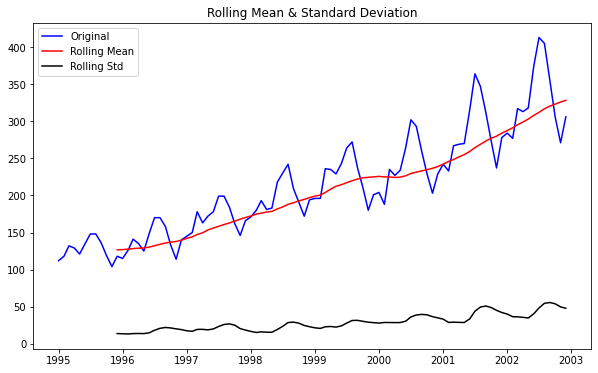

In [ ]:
#Plot rolling statistics:
plt.figure(figsize= (10,6))
orig = plt.plot(indexedData, color='blue',label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)
    

### Augmented Dickey-Fuller test:


In [ ]:
from statsmodels.tsa.stattools import adfuller

print ('Results of Dickey-Fuller Test:')
dftest = adfuller(indexedData, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                  1.340248
p-value                         0.996825
#Lags Used                     12.000000
Number of Observations Used    83.000000
Critical Value (1%)            -3.511712
Critical Value (5%)            -2.897048
Critical Value (10%)           -2.585713
dtype: float64


p_value is heigh therefore it is not a stationary data

Therefore we go for Data based techniques

#### Logscale

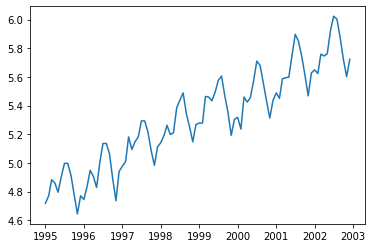

In [ ]:
# Estimating trend
indexedDataset_logScale = np.log(indexedData)
plt.plot(indexedDataset_logScale)

### Seasonal Decomposition

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

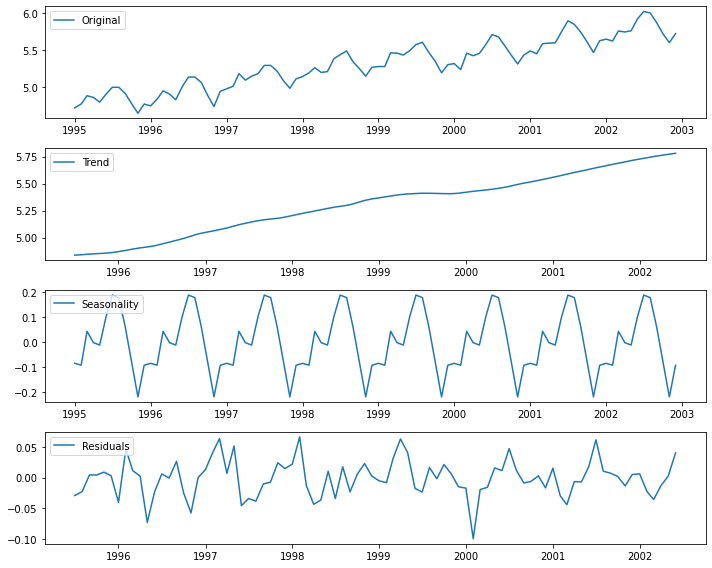

In [ ]:
decomposition = seasonal_decompose(indexedDataset_logScale)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(10,8))
plt.subplot(411)
plt.plot(indexedDataset_logScale, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='upper left')
plt.tight_layout()

### Splitting the data into Training and Testing 

In [ ]:
train = data.head(84)
test = data.tail(12)

In [ ]:
train

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
79,2001-08-01,347
80,2001-09-01,312
81,2001-10-01,274
82,2001-11-01,237


In [ ]:
test

,Month,Passengers
84,2002-01-01,284
85,2002-02-01,277
86,2002-03-01,317
87,2002-04-01,313
88,2002-05-01,318
89,2002-06-01,374
90,2002-07-01,413
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306


#### Mean actual Predicted Error ( MAPE value )

In [ ]:
def MAPE(org,pred):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)

### Simple Exponential Smoothing Model

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing # double exponential
from statsmodels.tsa.holtwinters import ExponentialSmoothing  # triple exponential

#### HYperparameter tunning for smoothing_level

In [ ]:
import numpy as np
x=np.linspace(0.1,1,20)
for i in x :
    ses_model = SimpleExpSmoothing(train["Passengers"]).fit(smoothing_level=i)
    pred_ses = ses_model.predict(start = test.index[0],end = test.index[-1])
    score=MAPE(test.Passengers, pred_ses) 
    print("smoothing_level ",i,"-->","MAPE Error",score)

smoothing_level  0.1 --> MAPE Error 15.813278811032573
smoothing_level  0.1473684210526316 --> MAPE Error 13.998308786798612
smoothing_level  0.19473684210526315 --> MAPE Error 13.43875758983704
smoothing_level  0.24210526315789474 --> MAPE Error 13.361780244106626
smoothing_level  0.2894736842105263 --> MAPE Error 13.557114617029564
smoothing_level  0.33684210526315794 --> MAPE Error 13.895321792313554
smoothing_level  0.38421052631578945 --> MAPE Error 14.289593448209663
smoothing_level  0.43157894736842106 --> MAPE Error 14.76306690519897
smoothing_level  0.4789473684210527 --> MAPE Error 15.224824028669062
smoothing_level  0.5263157894736842 --> MAPE Error 15.600944301455975
smoothing_level  0.5736842105263158 --> MAPE Error 15.874993628428264
smoothing_level  0.6210526315789474 --> MAPE Error 16.071640221230833
smoothing_level  0.6684210526315789 --> MAPE Error 16.145012862053974
smoothing_level  0.7157894736842105 --> MAPE Error 16.091775475637615
smoothing_level  0.7631578947368

Best MAPE value is for smoothing_level = 0.24

#### Model

In [ ]:
ses_model = SimpleExpSmoothing(train["Passengers"]).fit(smoothing_level=0.24)
pred_ses = ses_model.predict(start = test.index[0], end = test.index[-1])
MAPE(test.Passengers, pred_ses) 

13.358245180077153

In [ ]:
pred_ses

84    282.651011
85    282.651011
86    282.651011
87    282.651011
88    282.651011
89    282.651011
90    282.651011
91    282.651011
92    282.651011
93    282.651011
94    282.651011
95    282.651011
dtype: float64

###  Holts Exponential Smoothing Model or Double exponential Model

#### Hyperparameter tunning for smoothing_level and smoothing_trend

In [ ]:
import numpy as np
alphas=np.arange(0.1,1,0.9/10)
betas=np.arange(0.1,1,0.9/10)
l=[]
for i in alphas :
    for j in betas:
        hw_model = Holt(train["Passengers"]).fit(smoothing_level=i, smoothing_trend=j)
        print(hw_model)
        pred_hw = hw_model.predict(start = test.index[0],end = test.index[-1])
        score=MAPE(pred_hw,test.Passengers)
        print("smoothing_level ",i," smoothing_slope",j,"-->","MAPE Error",score)
        l.append((i,j,score))

smoothing_level  0.1  smoothing_slope 0.1 --> MAPE Error 11.825704431181222
smoothing_level  0.1  smoothing_slope 0.19 --> MAPE Error 10.985095982050025
smoothing_level  0.1  smoothing_slope 0.28 --> MAPE Error 11.308431992970638
smoothing_level  0.1  smoothing_slope 0.37 --> MAPE Error 11.748306843904194
smoothing_level  0.1  smoothing_slope 0.45999999999999996 --> MAPE Error 12.004590397121015
smoothing_level  0.1  smoothing_slope 0.5499999999999999 --> MAPE Error 12.027792542515442
smoothing_level  0.1  smoothing_slope 0.64 --> MAPE Error 11.82973525777463
smoothing_level  0.1  smoothing_slope 0.73 --> MAPE Error 11.538472607086037
smoothing_level  0.1  smoothing_slope 0.82 --> MAPE Error 11.309105000920068
smoothing_level  0.1  smoothing_slope 0.9099999999999999 --> MAPE Error 11.414437359201301
smoothing_level  0.19  smoothing_slope 0.1 --> MAPE Error 11.506480545716633
smoothing_level  0.19  smoothing_slope 0.19 --> MAPE Error 11.057273727732081
smoothing_level  0.19  smoothing_s

In [ ]:
a=pd.DataFrame(l,columns=["smoothing_level","smoothing_slope","score"])
a.sort_values(["score"])

,smoothing_level,smoothing_slope,score
1,0.10,0.19,10.985096
11,0.19,0.19,11.057274
12,0.19,0.28,11.166573
2,0.10,0.28,11.308432
8,0.10,0.82,11.309105
...,...,...,...
49,0.46,0.91,826.936017
47,0.46,0.73,858.326625
46,0.46,0.64,1304.676022
37,0.37,0.73,1611.465475


Best MAPE score is 10.98 
for smopthing_level = 0.1 and
smoothing_slope = 0.19

#### Model

In [ ]:
# Holt method 
hw_model = Holt(train["Passengers"]).fit(smoothing_level=0.1, smoothing_trend=0.19)
pred_hw = hw_model.predict(start = test.index[0],end = test.index[-1])
MAPE(pred_hw,test.Passengers)

10.985095982050025

In [ ]:
pred_hw

84    302.762441
85    306.732180
86    310.701918
87    314.671656
88    318.641395
89    322.611133
90    326.580872
91    330.550610
92    334.520348
93    338.490087
94    342.459825
95    346.429564
dtype: float64

### Holts winter exponential smoothing with additive seasonality and additive trend or  triple exponential

In [ ]:
hwe_model_add_add = ExponentialSmoothing(train["Passengers"],seasonal="add",trend="add",seasonal_periods=12).fit() #add the trend to the model
pred_hwe_add_add = hwe_model_add_add.predict(start = test.index[0],end = test.index[-1])

In [ ]:
MAPE(pred_hwe_add_add,test.Passengers) 

6.3810253704201285

In [ ]:
pred_hwe_add_add

84    282.165871
85    283.021846
86    310.306974
87    304.163722
88    303.449567
89    327.449708
90    352.449735
91    351.592793
92    326.449910
93    301.307326
94    278.021950
95    302.307010
dtype: float64

For all the above 3 models

triple exponential model is giving less error i,e MAPE score is less for this model

#### Building a Model for whole data and predicting the next years values

In [ ]:
hwe_model_add_add = ExponentialSmoothing(data["Passengers"],seasonal="add",trend="add",seasonal_periods=12).fit()

In [ ]:
#Forecasting for next 10 time periods
new=hwe_model_add_add.forecast(10)
df=pd.DataFrame(new, columns= ["Passengers"])
df

,Passengers
96,319.234886
97,311.527891
98,350.278075
99,346.984195
100,351.844121
101,403.924848
102,440.565979
103,427.445771
104,376.627413
105,329.766583


predicted No. of Passengers for the year 2003

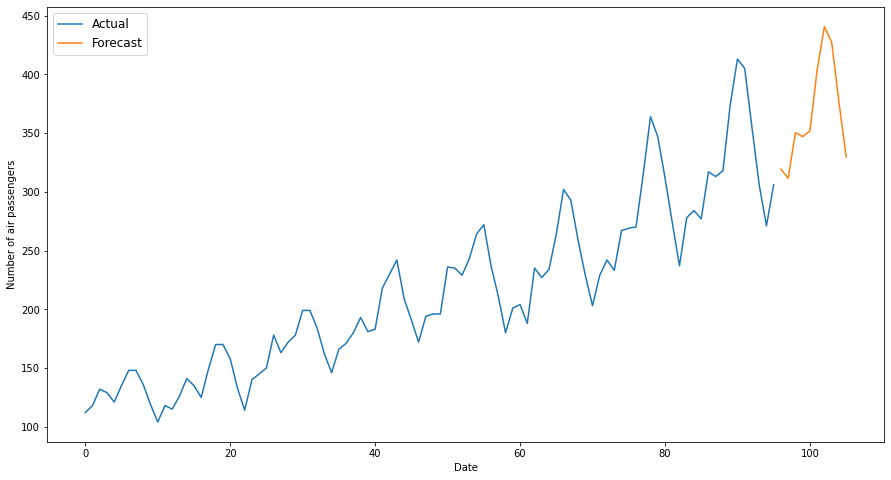

In [ ]:
plt.figure(figsize= (15,8))
plt.xlabel("Date")
plt.ylabel("Number of air passengers")
plt.plot(data["Passengers"], label="Actual")
plt.plot(df["Passengers"], label="Forecast")
plt.legend(loc='upper left', fontsize=12)
plt.show()

Forecasted data for the year 2003. is ploted in the above graph

# 2]Cocacola_Sales_Rawdata 

In [ ]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving CocaCola_Sales_Rawdata.xlsx to CocaCola_Sales_Rawdata.xlsx


In [ ]:
data=pd.read_excel('CocaCola_Sales_Rawdata.xlsx')

In [ ]:
data

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996
5,Q2_87,2104.411995
6,Q3_87,2014.362999
7,Q4_87,1991.746998
8,Q1_88,1869.049999
9,Q2_88,2313.631996


Visualization and Data Preprocessing

In [ ]:
data.shape

(42, 2)

In [ ]:
data.head()

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


In [ ]:
# We will extract Quarter values and Year values separately from 'Quarter column'
data['Quarters'] = 0
data['Year'] = 0
for i in range(42):
    p = data["Quarter"][i]
    data['Quarters'][i]= p[0:2]
    data['Year'][i]= p[3:5]

In [ ]:
data.head()

,Quarter,Sales,Quarters,Year
0,Q1_86,1734.827000,Q1,86
1,Q2_86,2244.960999,Q2,86
2,Q3_86,2533.804993,Q3,86
3,Q4_86,2154.962997,Q4,86
4,Q1_87,1547.818996,Q1,87


In [ ]:
# Getting dummy variables for Quarters Q1, Q2, Q3, Q4 
Quarters_Dummies = pd.DataFrame(pd.get_dummies(data['Quarters']))
data = pd.concat([data,Quarters_Dummies],axis = 1)
data.head()

,Quarter,Sales,Quarters,Year,Q1,Q2,Q3,Q4
0,Q1_86,1734.827000,Q1,86,1,0,0,0
1,Q2_86,2244.960999,Q2,86,0,1,0,0
2,Q3_86,2533.804993,Q3,86,0,0,1,0
3,Q4_86,2154.962997,Q4,86,0,0,0,1
4,Q1_87,1547.818996,Q1,87,1,0,0,0


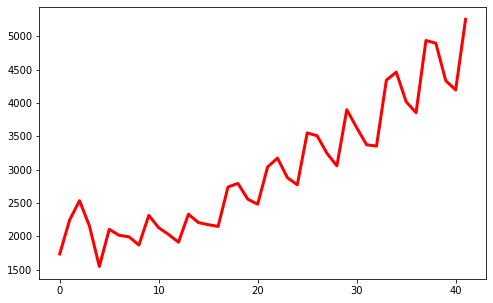

In [ ]:
# Lineplot for Sales of CocaCola
plt.figure(figsize=(8,5))
plt.plot(data['Sales'], color = 'red', linewidth=3)

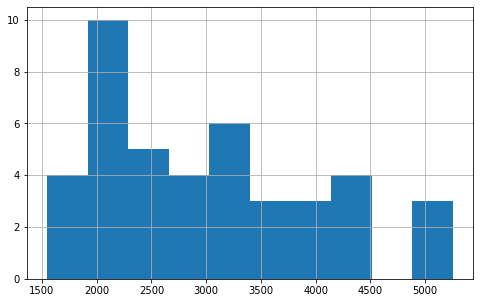

In [ ]:
# Histogram
data['Sales'].hist(figsize=(8,5))

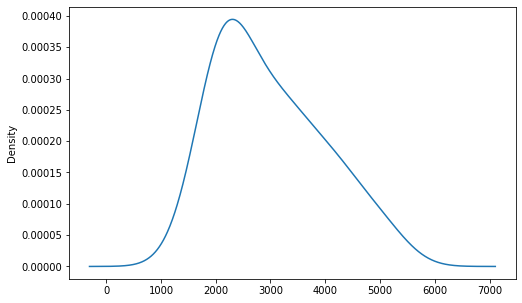

In [ ]:
# Density Plot
data['Sales'].plot(kind = 'kde', figsize=(8,5))

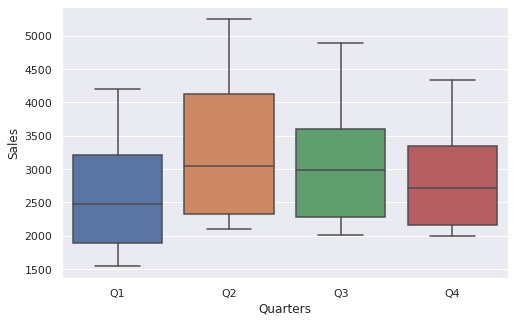

In [ ]:
#boxplot of Quarters Vs. Sales
sns.set(rc={'figure.figsize':(8,5)})
sns.boxplot(x="Quarters",y="Sales",data=data)

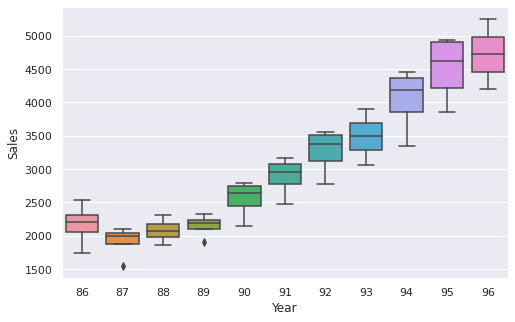

In [ ]:
# boxplot of Years Vs. Sales
sns.boxplot(x="Year",y="Sales",data=data)

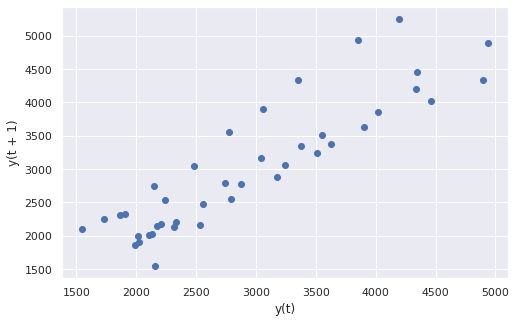

In [ ]:
from pandas.plotting import lag_plot
lag_plot(data['Sales'])
plt.show()

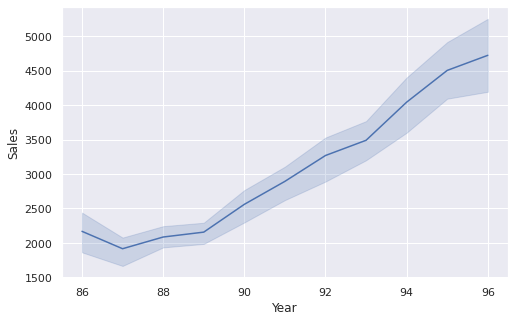

In [ ]:
plt.figure(figsize=(8,5))
sns.lineplot(x="Year",y="Sales",data=data)

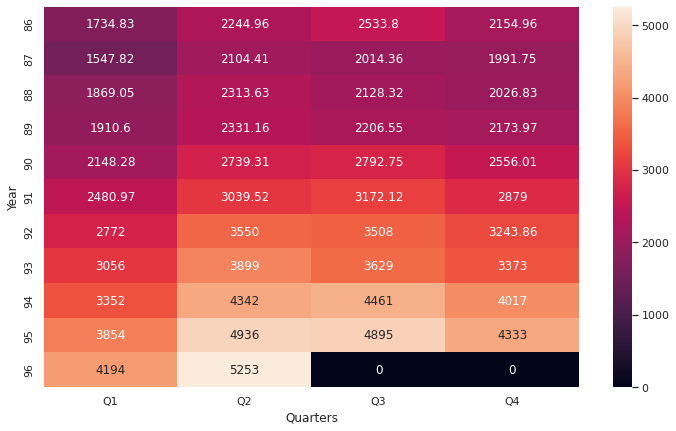

In [ ]:
plt.figure(figsize=(12, 7))
heatmap_y_month = pd.pivot_table(data=data,values="Sales",index="Year",columns="Quarters",aggfunc="mean",fill_value=0)
sns.heatmap(heatmap_y_month,annot=True,fmt="g")

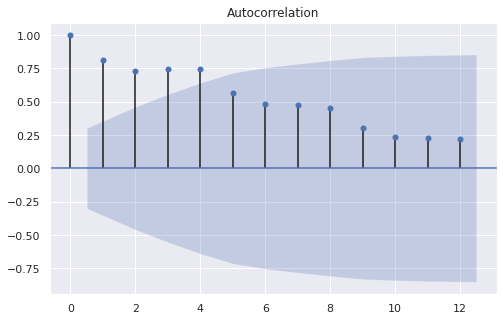

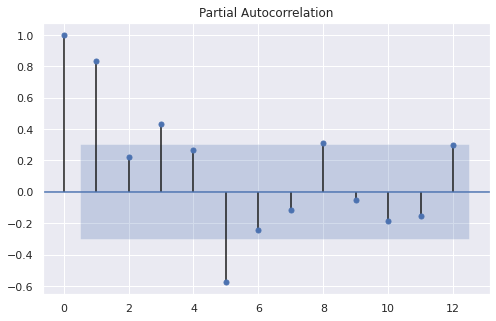

In [ ]:
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(data.Sales,lags=12)
tsa_plots.plot_pacf(data.Sales,lags=12)
plt.show()

Data Driven Forecasting Methods

In [ ]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing 

Splitting Data

In [ ]:
# Splitting data into Train and Test (77/33)
Train = data.head(32)
Test = data.tail(10)

Moving Average Method

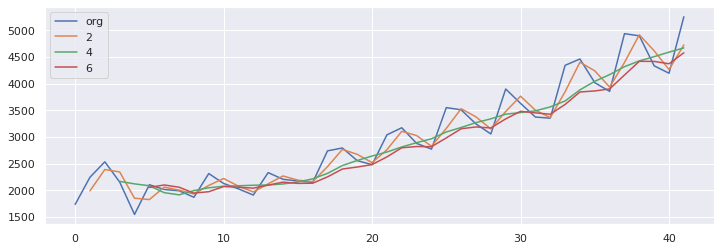

In [ ]:
plt.figure(figsize=(12,4))
data.Sales.plot(label="org")
for i in range(2,8,2):
    data["Sales"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

Time series decomposition plot



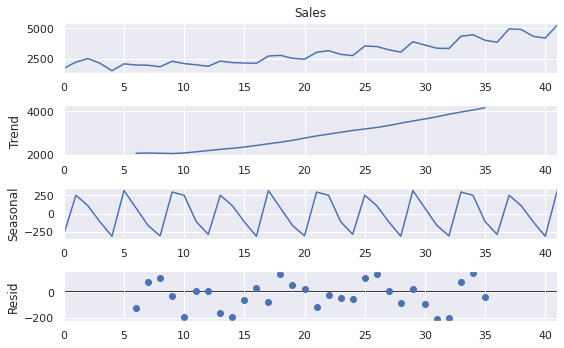

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

decompose_ts_add = seasonal_decompose(data.Sales,period=12)
decompose_ts_add.plot()
plt.show()

Evaluation Metric RMSE


In [ ]:
def RMSE(org, pred):
    rmse=np.sqrt(np.mean((np.array(org)-np.array(pred))**2))
    return rmse

Simple Exponential Method


In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
ses_model = SimpleExpSmoothing(Train["Sales"]).fit()
pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
rmse_ses_model = RMSE(Test.Sales, pred_ses)
rmse_ses_model

1034.9359056453961

Holt method

In [ ]:
hw_model = Holt(Train["Sales"]).fit()
pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])
rmse_hw_model = RMSE(Test.Sales, pred_hw)
rmse_hw_model

941.6367810616845

Holts winter exponential smoothing with additive seasonality and additive trend

In [ ]:
hwe_model_add_add = ExponentialSmoothing(Train["Sales"],seasonal="add",trend="add",seasonal_periods=4).fit()
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
rmse_hwe_add_add_model = RMSE(Test.Sales, pred_hwe_add_add)
rmse_hwe_add_add_model

522.8405512059857

Holts winter exponential smoothing with multiplicative seasonality and additive trend

In [ ]:
hwe_model_mul_add = ExponentialSmoothing(Train["Sales"],seasonal="mul",trend="add",seasonal_periods=4).fit() 
pred_hwe_mul_add = hwe_model_mul_add.predict(start = Test.index[0],end = Test.index[-1])
rmse_hwe_model_mul_add_model = RMSE(Test.Sales, pred_hwe_mul_add)
rmse_hwe_model_mul_add_model

551.239511691846

Model based Forecasting Methods

In [ ]:
# Data preprocessing for models
data["t"] = np.arange(1,43)
data["t_squared"] = data["t"]*data["t"]

data["log_sales"] = np.log(data["Sales"])

data.head()

,Quarter,Sales,Quarters,Year,Q1,Q2,Q3,Q4,t,t_squared,log_sales
0,Q1_86,1734.827000,Q1,86,1,0,0,0,1,1,7.458663
1,Q2_86,2244.960999,Q2,86,0,1,0,0,2,4,7.716443
2,Q3_86,2533.804993,Q3,86,0,0,1,0,3,9,7.837477
3,Q4_86,2154.962997,Q4,86,0,0,0,1,4,16,7.675529
4,Q1_87,1547.818996,Q1,87,1,0,0,0,5,25,7.344602


Splitting data

In [ ]:
# Splitting data into Train and Test (77/33)
Train = data.head(32)
Test = data.tail(10)

Linear Model

In [ ]:
import statsmodels.formula.api as smf 

linear_model = smf.ols('Sales~t',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear_model = RMSE(Test['Sales'], pred_linear)
rmse_linear_model


752.9233932767116

Exponential Model

In [ ]:
Exp = smf.ols('log_sales~t',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp_model = RMSE(Test['Sales'], np.exp(pred_Exp))
rmse_Exp_model

590.3316432076487

Quadratic Model

In [ ]:
Quad = smf.ols('Sales~t+t_squared',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_squared"]]))
rmse_Quad_model = RMSE(Test['Sales'], pred_Quad)
rmse_Quad_model

457.735735540752

Additive Seasonality model

In [ ]:
add_sea = smf.ols('Sales~Q1+Q2+Q3',data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['Q1', 'Q2', 'Q3']]))
rmse_add_sea = RMSE(Test['Sales'], pred_add_sea)
rmse_add_sea

1850.4665461858358

Additive Seasonality Quadratic model

In [ ]:
add_sea_Quad = smf.ols('Sales~t+t_squared+Q1+Q2+Q3',data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['Q1','Q2','Q3','t','t_squared']]))
rmse_add_sea_Quad_model = RMSE(Test['Sales'], pred_add_sea_quad)
rmse_add_sea_Quad_model   

277.35107711286423

Multiplicative Seasonality model

In [ ]:
Mul_sea = smf.ols('log_sales~Q1+Q2+Q3',data=Train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test))
rmse_Mul_sea = RMSE(Test['Sales'], np.exp(pred_Mult_sea))
rmse_Mul_sea

1908.2503948361166

Multiplicative Additive Seasonality model

In [ ]:
Mul_Add_sea = smf.ols('log_sales~t+Q1+Q2+Q3',data = Train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test))
rmse_Mul_Add_sea = RMSE(Test['Sales'], np.exp(pred_Mult_add_sea))
rmse_Mul_Add_sea

448.86781826918514

In [ ]:
list = [['Simple Exponential Method',rmse_ses_model], ['Holt method',rmse_hw_model],
          ['HW exp smoothing add',rmse_hwe_add_add_model],['HW exp smoothing mult',rmse_hwe_model_mul_add_model],
          ['Linear Mode',rmse_linear_model],['Exp model',rmse_Exp_model],['Quad model',rmse_Quad_model],
          ['add seasonality',rmse_add_sea],['Quad add seasonality',rmse_add_sea_Quad_model],
          ['Mult Seasonality',rmse_Mul_sea],['Mult add seasonality',rmse_Mul_Add_sea]]

df = pd.DataFrame(list, columns =['Model', 'RMSE_Value']) 
df

,Model,RMSE_Value
0,Simple Exponential Method,1034.935906
1,Holt method,941.636781
2,HW exp smoothing add,522.840551
3,HW exp smoothing mult,551.239512
4,Linear Mode,752.923393
5,Exp model,590.331643
6,Quad model,457.735736
7,add seasonality,1850.466546
8,Quad add seasonality,277.351077
9,Mult Seasonality,1908.250395


Building final model with least RMSE value

In [ ]:
data.head()

,Quarter,Sales,Quarters,Year,Q1,Q2,Q3,Q4,t,t_squared,log_sales
0,Q1_86,1734.827000,Q1,86,1,0,0,0,1,1,7.458663
1,Q2_86,2244.960999,Q2,86,0,1,0,0,2,4,7.716443
2,Q3_86,2533.804993,Q3,86,0,0,1,0,3,9,7.837477
3,Q4_86,2154.962997,Q4,86,0,0,0,1,4,16,7.675529
4,Q1_87,1547.818996,Q1,87,1,0,0,0,5,25,7.344602


In [ ]:
final_model = smf.ols('Sales~t+t_squared+Q1+Q2+Q3',data=data).fit()
pred_final = pd.Series(final_model.predict(data[['Q1','Q2','Q3','t','t_squared']]))
rmse_final_model = RMSE(data['Sales'], pred_final)
rmse_final_model

159.05522576522478

In [ ]:
pred_df = pd.DataFrame({'Actual' : data.Sales, 'Predicted' : pred_final})
pred_df

,Actual,Predicted
0,1734.827000,1626.592727
1,2244.960999,2268.402339
2,2533.804993,2189.685821
3,2154.962997,1867.242917
4,1547.818996,1658.311143
5,2104.411995,2314.185178
6,2014.362999,2249.533083
7,1991.746998,1941.154603
8,1869.049999,1746.287252
9,2313.631996,2416.225709


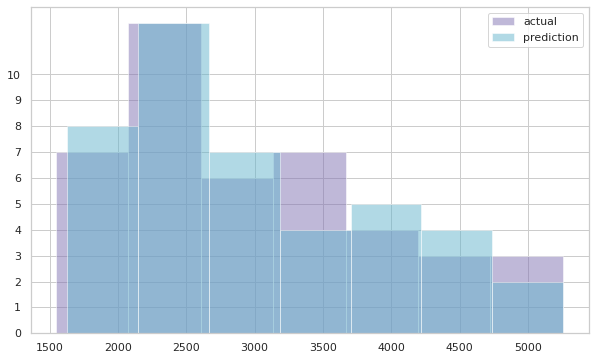

In [ ]:
# Actual Vs Predicted graph

sns.set_style('whitegrid')

plt.rcParams['figure.figsize'] = (10, 6) 
_, ax = plt.subplots()
ax.hist(data.Sales, color = 'm', alpha = 0.5, label = 'actual', bins=7)
ax.hist(pred_final, color = 'c', alpha = 0.5, label = 'prediction', bins=7)
ax.yaxis.set_ticks(np.arange(0,11))
ax.legend(loc = 'best')
plt.show()

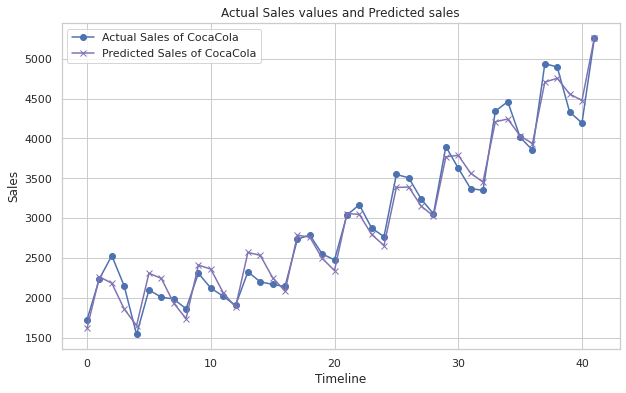

In [ ]:
# Plot of Actual Sales values and Predicted sales values
plt.plot(data.Sales, color='b',marker='o', label='Actual Sales of CocaCola')
plt.plot(pred_final, color='m',marker='x', label='Predicted Sales of CocaCola')

# Added titles and adjust dimensions
plt.title('Actual Sales values and Predicted sales')
plt.xlabel("Timeline")
plt.ylabel("Sales")
plt.legend()
plt.rcParams['figure.figsize'] = (10,8) 

plt.show()